In [74]:
import warnings
warnings.filterwarnings("ignore")

In [30]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

titanic_df = pd.read_csv("./train.csv")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [31]:
print("## 학습데이터 정보 ##")
print(titanic_df.info())

## 학습데이터 정보 ##
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [32]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# 데이터 클랜징

전체 데이터 개수 RangeIndex와 각 컬럼의 데이터 개수를 비교하여 Null개수를 파악한다.  
그리고 Null값을 어떻게 처리할지 결정할 것


In [33]:
# fillna 활용
titanic_df["Age"].fillna(titanic_df["Age"].mean(), inplace=True)
titanic_df["Cabin"].fillna('N',inplace=True)
titanic_df["Embarked"].fillna('N',inplace=True)
print("## 학습 데이터 컬럼별 null값 개수 ## \n", titanic_df.isnull().sum())
print("\n ## 학습 데이터 컬럼 총 null값 개수 ## :",titanic_df.isnull().sum().sum())

## 학습 데이터 컬럼별 null값 개수 ## 
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

 ## 학습 데이터 컬럼 총 null값 개수 ## : 0


In [35]:
# 문자열 피처들이 카테고리일 경우 분포를 살펴본다
# 또한 카테고리가 제대로 나뉘어 있는지 확인이 가능하다.
# value_counts() 활용, 자동으로 정렬된다.
print('Sex 값 분포:\n',titanic_df["Sex"].value_counts())
print('\n Cabin 값 분포:\n',titanic_df["Cabin"].value_counts())
print('\n Embarked 값 분포:\n',titanic_df["Embarked"].value_counts())

Sex 값 분포:
 Sex
male      577
female    314
Name: count, dtype: int64

 Cabin 값 분포:
 Cabin
N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: count, Length: 148, dtype: int64

 Embarked 값 분포:
 Embarked
S    644
C    168
Q     77
N      2
Name: count, dtype: int64


In [36]:
titanic_df.Cabin = titanic_df.Cabin.str[:1]
titanic_df.Cabin.head()

0    N
1    C
2    N
3    C
4    N
Name: Cabin, dtype: object

대략적인 전처리 후 데이터를 탐색해본다.

In [37]:
# 성별과 생존의 연관성을 살펴본다.
titanic_df.groupby(["Sex","Survived"])["Survived"].count() # 그룹바이에 agg는 전체 컬럼에 적용되기에 []를 통해 셀렉션이 필요

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

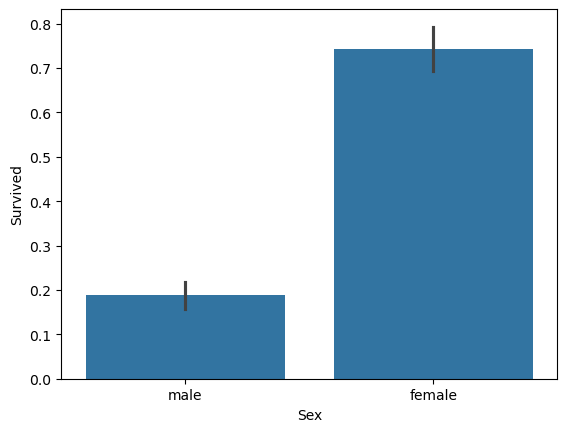

In [38]:
# 시각화
sns.barplot(data=titanic_df,x="Sex",y="Survived")

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

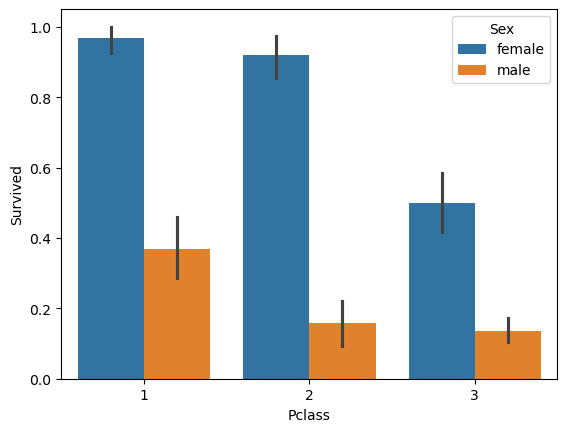

In [39]:
sns.barplot(data=titanic_df,x="Pclass",y="Survived",hue="Sex")

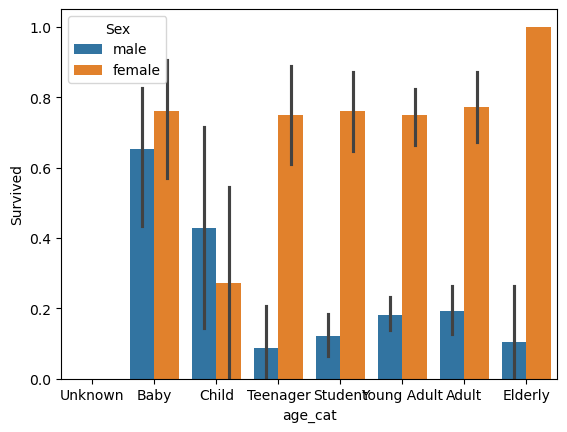

In [40]:
# 나이의 경우 값 종류가 많기 때문에 범위별로 분류해 카테고리 값을 할당한다!!
# sns.barplot(data=titanic_df,x="Age",y="Survived")

def get_category(age):
    if age <= -1: 
        cat = 'Unknown' 
    elif age <= 5: 
        cat= 'Baby'
    elif age <= 12: 
        cat = 'Child' 
    elif age <= 18: 
        cat = 'Teenager'
    elif age <= 25: 
        cat= 'Student'
    elif age <= 35: 
        cat= 'Young Adult' 
    elif age <= 60: 
        cat = 'Adult'
    else:
        cat = 'Elderly' 
    return cat

# X축의 값을 순차적으로 표시하기 위한 설정
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

titanic_df["age_cat"] = titanic_df["Age"].apply(lambda x : get_category(x))
sns.barplot(data=titanic_df,x="age_cat",y="Survived",hue="Sex",order=group_names)
# 후에 머신러닝에 영향이 없도록 age_cat을 삭제
titanic_df.drop("age_cat",axis=1,inplace=True)


### 문자열 카테고리 피처를 숫자형 카테고리 피처로 변환한다.

In [41]:
from sklearn.preprocessing import LabelEncoder

def encode_features(dataDF):
    features=["Cabin","Sex","Embarked"]
    for feature in features:
        le = LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature]=le.transform(dataDF[feature])
        
    return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


## 피처 가공한 내역 정리 및 함수 생성

In [48]:
# Null 처리 함수
def fillna(df):
    df["Age"].fillna(df["Age"].mean(), inplace=True)
    df["Cabin"].fillna('N',inplace=True)
    df["Embarked"].fillna('N',inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 피처 제거
def drop_features(df):
    df.drop(["PassengerId","Name","Ticket"],axis=1,inplace=True)
    return df

# 레이블 인코딩 수행
def format_features(df):
    df.Embarked = df.Embarked.str[:1]
    features=["Cabin","Sex","Embarked"]
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature]=le.transform(df[feature])
    return df

# 앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [49]:
# 데이터 전처리 함수를 바탕으로 다시 원본 데이터를 가공
titanic_df = pd.read_csv("./train.csv")

# 피처데이터 세트와 레이블 데이터 세트 추출.
y_titanic_df = titanic_df["Survived"]
X_titanic_df = titanic_df.drop("Survived",axis=1)

X_titanic_df = transform_features(X_titanic_df)

# 데이터 세트 분리

In [51]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_titanic_df,y_titanic_df,test_size=0.2,random_state=11)

In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()
lr_clf = LogisticRegression()

# DecisionTreeClassifier 학습/예측 평가
dt_clf.fit(X_train,y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test,dt_pred)))

# RandomForestClassifier 학습/예측 평가
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print("RandomForestClassifier 정확도: {0:.4f}".format(accuracy_score(y_test,rf_pred)))

# LogisticRegression 학습/예측 평가
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print("LogisticRegression 정확도: {0:.4f}".format(accuracy_score(y_test,lr_pred)))

/Users/seojeongsik/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/seojeongsik/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/seojeongsik/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/seojeongsik/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: Future

DecisionTreeClassifier 정확도: 0.7989
RandomForestClassifier 정확도: 0.8547
LogisticRegression 정확도: 0.8659


/Users/seojeongsik/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/seojeongsik/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


In [71]:
from sklearn.model_selection import KFold

def exec_kfold(clf,folds=5):
    kfold = KFold(n_splits=folds)
    scores = []
    
    for iter_count, (train_index,test_index) in enumerate(kfold.split(X_titanic_df)):
        # X_train, X_test = X_titanic_df[train_index],X_titanic_df[test_index] # keyerror가 난다. Df형태로 인한 인덱스 호출 문제
        # y_train, y_test = y_titanic_df[train_index],y_titanic_df[test_index]
        X_train, X_test = X_titanic_df.values[train_index],X_titanic_df.values[test_index] # values를 통해 ndarr로 변경하여 인덱스에 영향을 안받도록 변경
        y_train, y_test = y_titanic_df.values[train_index],y_titanic_df.values[test_index]
        clf.fit(X_train,y_train)
        pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test,pred)
        scores.append(accuracy)
        print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count,accuracy))
        
    mean_score = np.mean(scores)
    print("평균 정확도: {0:.4f}".format(mean_score))

exec_kfold(dt_clf, folds=5)

교차 검증 0 정확도: 0.7598
교차 검증 1 정확도: 0.7697
교차 검증 2 정확도: 0.8090
교차 검증 3 정확도: 0.7809
교차 검증 4 정확도: 0.8034
평균 정확도: 0.7845


In [76]:
# kfold를 cross_val_score api를 통해 접근
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_titanic_df,y_titanic_df,cv=5) # scoring의 기본값은 분류는 accuracy, 회귀는 r2
for iter_count, accuracy in enumerate(scores):
    print("교차 검증 {0} 정확도 : {1:.4f}".format(iter_count,accuracy))
    
print("평균 정확도 : {:.4f}".format(np.mean(scores)))

교차 검증 0 정확도 : 0.7318
교차 검증 1 정확도 : 0.7584
교차 검증 2 정확도 : 0.8090
교차 검증 3 정확도 : 0.7640
교차 검증 4 정확도 : 0.8146
평균 정확도 : 0.7756


In [75]:
# GridSearchCV를 이용하여 최적의 하이퍼파라미터를 찾고 예측 성능을 측정
from sklearn.model_selection import GridSearchCV

param = {"max_depth" : [2,3,5,10],
         "min_samples_split" : [2,3,5],
         "min_samples_leaf" : [1,5,8]}

grid_dclf = GridSearchCV(dt_clf,param_grid = param, scoring = 'accuracy', cv= 5)
grid_dclf.fit(X_train, y_train)

print("GridSearchCV 최적 하이퍼 파라미터 : ",grid_dclf.best_params_)
print("GridSearchCV 최적 정확도 : ",grid_dclf.best_score_)
best_dclf = grid_dclf.best_estimator_

dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test,dpredictions)
print("테스트 세트에서의 DecisionTreeClassifier 정확도 : {:.4f}".format(accuracy))

GridSearchCV 최적 하이퍼 파라미터 :  {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5}
GridSearchCV 최적 정확도 :  0.8034768048852555
테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.8659
